In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl/matches.csv
/kaggle/input/ipl/deliveries.csv
/kaggle/input/saurav/innings-dataset.csv


In [2]:
match = pd.read_csv('/kaggle/input/ipl/matches.csv')
delivery = pd.read_csv('/kaggle/input/ipl/deliveries.csv')
innings = pd.read_csv('/kaggle/input/saurav/innings-dataset.csv')

In [3]:
innings.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
delivery = delivery.merge(match,left_on = "match_id",right_on="id")

In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [7]:
delivery = delivery[delivery['inning']==1]

In [8]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [9]:
runs_per_stadium = delivery.groupby('venue').sum()['total_runs']

In [10]:
match_per_stadium = match['venue'].value_counts()

In [11]:
avg_score_stadium = runs_per_stadium/match_per_stadium

In [12]:
avg_score_stadium

Barabati Stadium                                        167.714286
Brabourne Stadium                                       180.363636
Buffalo Park                                            147.333333
De Beers Diamond Oval                                   158.000000
Dr DY Patil Sports Academy                              146.647059
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     158.000000
Dubai International Cricket Stadium                     148.857143
Eden Gardens                                            154.081967
Feroz Shah Kotla                                        161.633333
Green Park                                              161.250000
Himachal Pradesh Cricket Association Stadium            175.666667
Holkar Cricket Stadium                                  156.800000
JSCA International Stadium Complex                      149.000000
Kingsmead                                               152.000000
M Chinnaswamy Stadium                                   167.89

In [13]:
avg_score_stadium = avg_score_stadium.reset_index()

In [14]:
avg_score_stadium.rename(columns={'index':'venue',0:'avg_score_stadium'},inplace=True)

In [15]:
avg_score_stadium.head()

,venue,avg_score_stadium
0,Barabati Stadium,167.714286
1,Brabourne Stadium,180.363636
2,Buffalo Park,147.333333
3,De Beers Diamond Oval,158.000000
4,Dr DY Patil Sports Academy,146.647059


In [16]:
innings = innings.merge(avg_score_stadium,on='venue')

In [17]:
runs_avg_batting_team = innings.drop_duplicates(subset=['mid']).groupby('bat_team').mean()['total']

In [18]:
runs_avg_bowling_team = innings.drop_duplicates(subset=['mid']).groupby('bowl_team').mean()['total']

In [19]:
runs_avg_batting_team = runs_avg_batting_team.reset_index()
runs_avg_bowling_team = runs_avg_bowling_team.reset_index()

In [20]:
runs_avg_batting_team.rename(columns={'index':'bat_team',0:'avg_runs_batting_team'},inplace=True)
runs_avg_bowling_team.rename(columns={'index':'bowl_team',0:'avg_runs_bowling_team'},inplace=True)

In [21]:
innings = innings.merge(runs_avg_batting_team,on='bat_team')

In [22]:
innings = innings.merge(runs_avg_bowling_team,on='bowl_team')

In [23]:
innings.rename(columns={'total_y':'avg_batting_team_score','total':'avg_bowling_team_score'},inplace=True)

In [24]:
innings.rename(columns={'total_x':'total'},inplace=True)

In [25]:
innings.corr()['total']

mid                       0.096586
runs                      0.254498
wickets                  -0.337343
overs                     0.022282
runs_last_5               0.368253
wickets_last_5           -0.273475
striker                   0.381664
non-striker               0.293233
total                     1.000000
avg_score_stadium         0.262129
avg_batting_team_score    0.161425
avg_bowling_team_score    0.149077
Name: total, dtype: float64

In [26]:
innings.drop(columns=['mid','date','batsman','bowler','striker','non-striker'],axis=1,inplace=True)

In [27]:
innings.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,avg_score_stadium,avg_batting_team_score,avg_bowling_team_score
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222,167.893939,156.121212,161.911392
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222,167.893939,156.121212,161.911392
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222,167.893939,156.121212,161.911392
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222,167.893939,156.121212,161.911392
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222,167.893939,156.121212,161.911392


In [28]:
innings.shape

(76014, 12)

In [29]:
innings['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Rajasthan Royals', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Deccan Chargers',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore'],
      dtype=object)

In [30]:
obsolete_teams = ['Kochi Tuskers Kerala','Pune Warriors','Deccan Chargers','Rising Pune Supergiants','Gujarat Lions','Rising Pune Supergiant']

In [31]:
innings = innings[~(innings['bat_team'].isin(obsolete_teams)) & ~(innings['bowl_team'].isin(obsolete_teams))]

In [32]:
innings.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,avg_score_stadium,avg_batting_team_score,avg_bowling_team_score
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222,167.893939,156.121212,161.911392
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222,167.893939,156.121212,161.911392
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222,167.893939,156.121212,161.911392
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222,167.893939,156.121212,161.911392
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222,167.893939,156.121212,161.911392


In [33]:
new = pd.get_dummies(innings, columns=['venue','bat_team','bowl_team'],drop_first=True)

In [34]:
new.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,avg_score_stadium,avg_batting_team_score,avg_bowling_team_score,venue_Brabourne Stadium,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,1,0,0.1,1,0,222,167.893939,156.121212,161.911392,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0.2,1,0,222,167.893939,156.121212,161.911392,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0.2,2,0,222,167.893939,156.121212,161.911392,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0.3,2,0,222,167.893939,156.121212,161.911392,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,0.4,2,0,222,167.893939,156.121212,161.911392,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X = new.drop(columns=['total'],axis=1)

In [37]:
X = scaler.fit_transform(X)

In [38]:
X[0].shape

(52,)

In [39]:
y = new['total'].values

In [40]:
y

array([222, 222, 222, ..., 209, 209, 209])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
X_train.shape

(43048, 52)

In [43]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [44]:
model= Sequential()

In [45]:
model.add(Dense(128,activation='relu',input_dim=52))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6784      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 23,425
Trainable params: 23,425
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='Adam',loss='mse',metrics=['mse'])

In [48]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1346/1346 [==============================] - 2s 1ms/step - loss: 1533.9901 - mse: 1533.9901 - val_loss: 280.2358 - val_mse: 280.2358
Epoch 2/100
1346/1346 [==============================] - 2s 1ms/step - loss: 256.1325 - mse: 256.1325 - val_loss: 229.6300 - val_mse: 229.6300
Epoch 3/100
1346/1346 [==============================] - 2s 1ms/step - loss: 229.5278 - mse: 229.5278 - val_loss: 214.9276 - val_mse: 214.9276
Epoch 4/100
1346/1346 [==============================] - 2s 1ms/step - loss: 213.0010 - mse: 213.0010 - val_loss: 215.4541 - val_mse: 215.4541
Epoch 5/100
1346/1346 [==============================] - 2s 1ms/step - loss: 196.9327 - mse: 196.9327 - val_loss: 185.0894 - val_mse: 185.0894
Epoch 6/100
1346/1346 [==============================] - 2s 1ms/step - loss: 183.2579 - mse: 183.2579 - val_loss: 181.8271 - val_mse: 181.8271
Epoch 7/100
1346/1346 [==============================] - 2s 1ms/step - loss: 171.1454 - mse: 171.1454 - val_loss: 169.9838 - val_mse: 169.98

In [49]:
 y_pred=model.predict_classes(X_test)

In [50]:
history.history

{'loss': [1533.9901123046875,
  256.1325378417969,
  229.52784729003906,
  213.00099182128906,
  196.93267822265625,
  183.2578582763672,
  171.14544677734375,
  162.0889434814453,
  154.4879150390625,
  147.644775390625,
  142.47496032714844,
  139.153564453125,
  135.08314514160156,
  132.49253845214844,
  130.2327117919922,
  128.41641235351562,
  125.85738372802734,
  123.16333770751953,
  121.64779663085938,
  119.99675750732422,
  118.48685455322266,
  116.96500396728516,
  115.68087005615234,
  113.64000701904297,
  112.4837875366211,
  111.61843872070312,
  110.43890380859375,
  109.01598358154297,
  107.65895080566406,
  107.49702453613281,
  105.80353546142578,
  104.92396545410156,
  104.91986846923828,
  103.2258071899414,
  102.76976776123047,
  100.95653533935547,
  100.70848846435547,
  100.108642578125,
  100.3521728515625,
  98.86907958984375,
  98.02613067626953,
  97.28365325927734,
  96.48583984375,
  95.45133209228516,
  94.94253540039062,
  94.360107421875,
  93.9

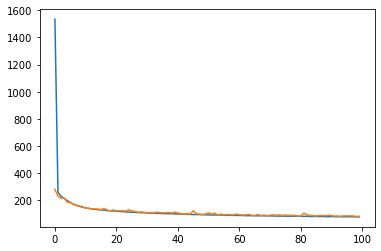

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

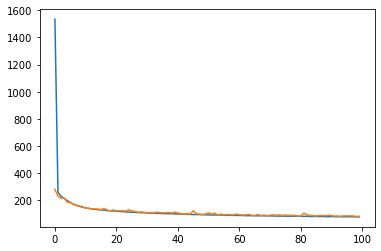

In [52]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])